## Prompt Data

Requirements: <br>
pandas <br>
openpyxl <br>
matplotlib <br>
wordcloud

In [2]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("Gesprekken.xlsx", header=None)

df = df.drop(df.columns[[0, 1]], axis=1)
df

2
0    user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l...
1    user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te...
2    user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te...
3    user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te...
4    user: Hoi Vincent..\n\nbot: Hé, zoo leuk je te...
..                                                 ...
547  user: Ben je ooit verliefd geweest?\n\nbot: Ac...
548  user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l...
549  user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l...
550  user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l...
551  user: Hoi Vincent\n\nbot: Hé, zoo leuk je te l...

[552 rows x 1 columns]

In [3]:
# Split the text in the dataframe on "\n"
df_split = df[2].str.split('\n', expand=True)

# Display the first few rows of the split dataframe
df_split.head()

0   1                                                  2    \
0    user: Hoi Vincent      bot: Hé, zoo leuk je te leren kennen. Hoe gaat...   
1  user: Hoi Vincent..                  bot: Hé, zoo leuk je te leren kennen.   
2  user: Hoi Vincent..                  bot: Hé, zoo leuk je te leren kennen.   
3  user: Hoi Vincent..                  bot: Hé, zoo leuk je te leren kennen.   
4  user: Hoi Vincent..                  bot: Hé, zoo leuk je te leren kennen.   

  3                                                4     5    \
0                            user: Wie inspireerde je?         
1      user: Voor wie schilderde je de amandelbloesem?         
2      user: Voor wie schilderde je de amandelbloesem?  None   
3           user: Heb je wel eens met een man gezoend?         
4               user: Ben je weleens verliefd geweest?         

                                                 6     7    \
0  bot: Ik liet me graag inspireren door andere k...         
1  bot: Waarde vriend, ik schilderde de amandelbl...         
2                                               None  None   
3  bot: Waarde vriend, ik heb in mijn leven enkel...         
4  bot: Ja, ik ben weleens verliefd geweest. Ik w...         

                                                 8     9    ...   155   156  \
0                                  user: En Gauguin?        ...  None  None   
1                     user: EN waren ze er blij mee?        ...  None  None   
2                                               None  None  ...  None  None   
3           user: Wat heb je het vaakst geschilderd?        ...  None  None   
4  bot: Excuses, dat was niet mijn bedoeling. Ik ...        ...  None  None   

    157   158   159   160   161   162   163   164  
0  None  None  None  None  None  None  None  None  
1  None  None  None  None  None  None  None  None  
2  None  None  None  None  None  None  None  None  
3  None  None  None  None  None  None  None  None  
4  None  None  None  None  None  None  None  None  

[5 rows x 165 columns]

In [4]:
# Function to calculate the length of each row until a column with None is reached
def row_length_until_none(row):
    for i, value in enumerate(row):
        if value is None:
            return i
    return len(row)

# Apply the function to each row and calculate the average length
average_length = df_split.apply(row_length_until_none, axis=1).mean()
print(f"The average length of rows until a column with None is reached: {average_length}")

The average length of rows until a column with None is reached: 17.13768115942029


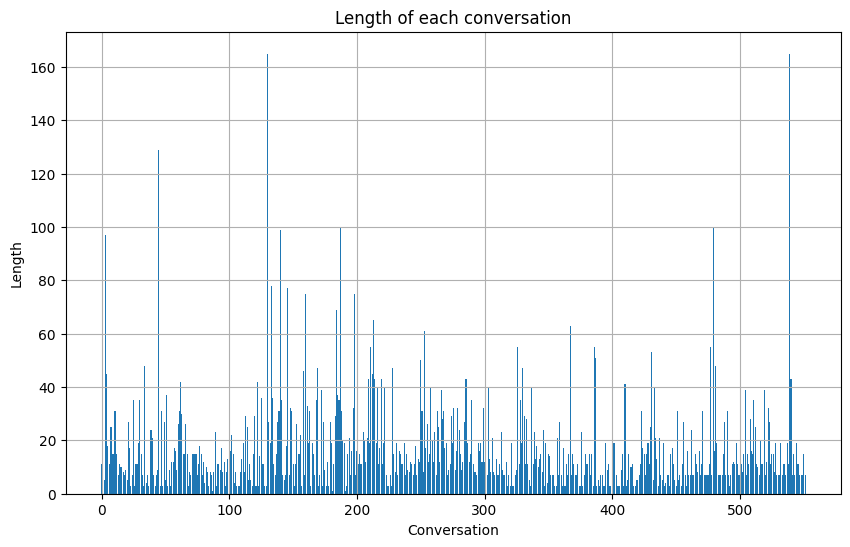

In [5]:
import matplotlib.pyplot as plt

# Calculate the row lengths until None for each row
row_lengths = df_split.apply(row_length_until_none, axis=1)

# Plot the row lengths using a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(row_lengths)), row_lengths)
plt.title('Length of each conversation')
plt.xlabel('Conversation')
plt.ylabel('Length')
plt.grid(True)
plt.show()

In [6]:
def count_words_until_none(row):
    word_count = 0
    for cell in row:
        if cell is None:
            break
        word_count += len(str(cell).split())
    return word_count

# Apply the function to each row
word_counts = df_split.apply(count_words_until_none, axis=1)

# Display the word counts
word_counts

0       138
1       274
2        18
3      1281
4       623
       ... 
547     173
548      54
549      59
550     145
551      68
Length: 552, dtype: int64

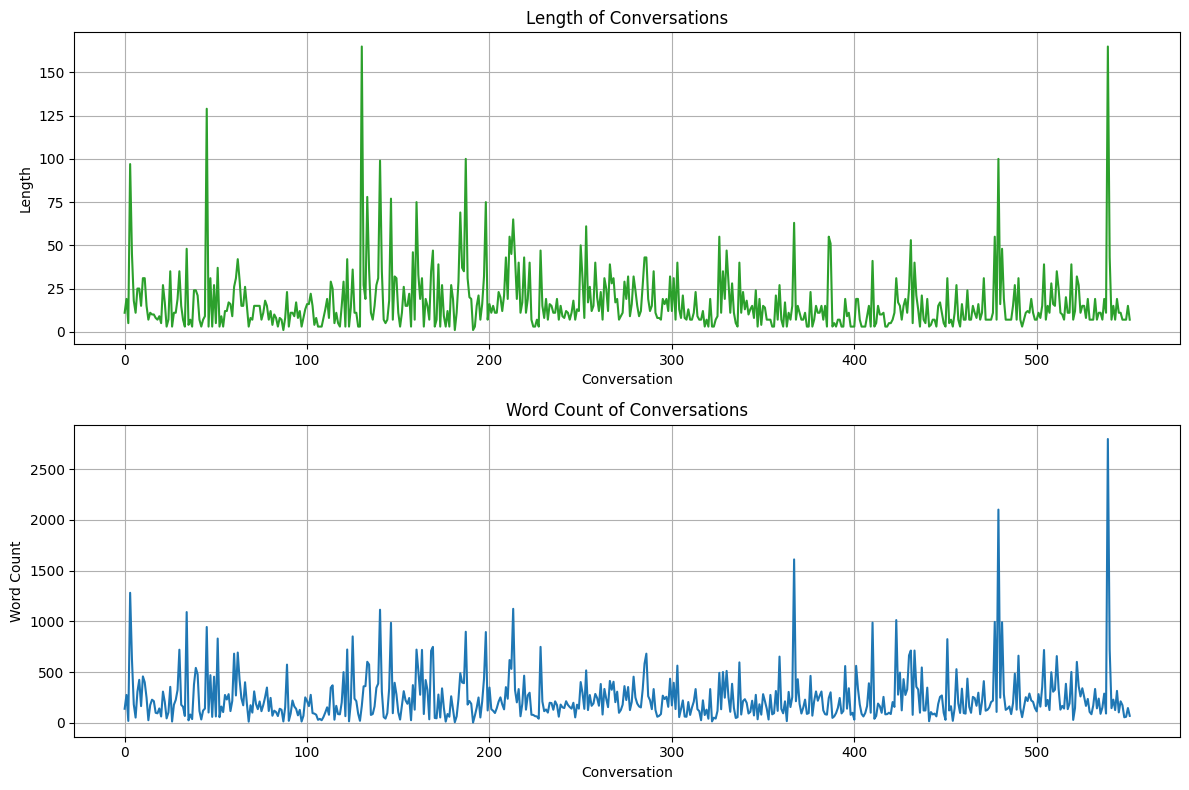

In [7]:
fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(12, 8))

# Plot word counts
ax1.plot(word_counts, color='tab:blue')
ax1.set_title('Word Count of Conversations')
ax1.set_xlabel('Conversation')
ax1.set_ylabel('Word Count')
ax1.grid(True)

# Plot conversation lengths
ax2.plot(row_lengths, color='tab:green')
ax2.set_title('Length of Conversations')
ax2.set_xlabel('Conversation')
ax2.set_ylabel('Length')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [8]:
# Get the first row
row = df_split.iloc[1]

# Iterate through the cells and print them one by one
for cell in row:
    if cell is not None:
        print(cell)

user: Hoi Vincent..

bot: Hé, zoo leuk je te leren kennen.

user: Voor wie schilderde je de amandelbloesem?

bot: Waarde vriend, ik schilderde de amandelbloesem als cadeau voor mijn broer Theo en zijn vrouw Jo, omdat zij net een zoon hadden gekregen: Vincent Willem. Het schilderij was een symbool voor nieuw leven en ik hoopte dat mijn neefje net zo vasthoudend en moedig zou worden als ik.

user: EN waren ze er blij mee?

bot: Ja, Theo en Jo waren erg blij met de amandelbloesem. Het schilderij hing in hun slaapkamer en zij waren er zeer aan gehecht. Het schilderij is later doorgegeven aan hun zoon, Vincent Willem van Gogh.

user: Vertel eens iets over Sien?

bot: Clasina Maria 'Sien' Hoornik was een vrouw die ik ontmoette in 1882 en met wie ik een relatie had. Ze was een voormalige prostituee en woonde in Den Haag met haar moeder. Ik tekende een aantal portretten van haar en haar kinderen en ik was erg begaan met haar welzijn. Na een tijdje verhuisde ze bij mij in en we woonden samen in

In [ ]:
from collections import Counter
import re

# Flatten the dataframe into a single string
all_text = ' '.join(df_split.fillna('').values.flatten())

# Use regular expressions to find all words
words_prompts = re.findall(r'\b\w+\b', all_text.lower())

# Count the occurrences of each word
word_counts = Counter(words)

# Display the most common words
most_common_words = word_counts.most_common()
for word in most_common_words:
    print(word)

('ik', 5458)
('en', 3995)
('het', 3956)
('de', 3728)
('mijn', 2977)
('een', 2950)
('van', 2656)
('in', 2599)
('je', 2522)
('user', 2264)
('bot', 2210)
('dat', 1754)
('te', 1571)
('is', 1414)
('met', 1385)
('niet', 1319)
('me', 1050)
('op', 1008)
('voor', 1000)
('heb', 961)
('om', 924)
('zijn', 919)
('maar', 911)
('was', 893)
('wat', 873)
('die', 871)
('mij', 843)
('ben', 785)
('kan', 775)
('als', 772)
('ook', 697)
('werk', 681)
('hoe', 593)
('vincent', 588)
('of', 569)
('aan', 552)
('leven', 510)
('door', 505)
('er', 501)
('over', 477)
('ah', 460)
('vriend', 422)
('uit', 407)
('u', 404)
('zou', 364)
('aardappeleters', 360)
('waarde', 358)
('wel', 355)
('veel', 354)
('schilderijen', 350)
('dan', 349)
('waar', 346)
('meer', 341)
('nog', 340)
('zo', 336)
('schilderij', 326)
('had', 314)
('the', 311)
('gogh', 308)
('i', 308)
('kunst', 306)
('and', 297)
('vaak', 293)
('tijd', 292)
('nuenen', 288)
('naar', 283)
('vind', 280)
('ja', 277)
('jij', 272)
('hij', 270)
('ze', 261)
('zie', 255)
('zo

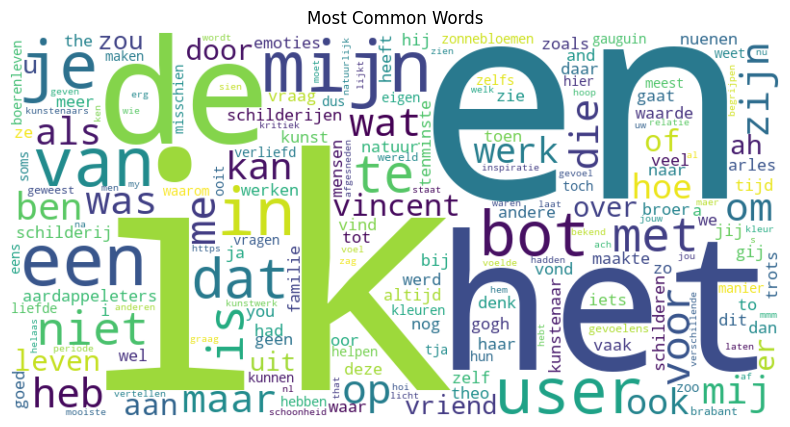

In [10]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_counts))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words')
plt.show()

### Next steps:
- Look at possible libraries of certain word types in Dutch (such as "ik", "mijn", etc.)

In [40]:
from nltk.tag import PerceptronTagger
from nltk.corpus import alpino as alp
from nltk.tag import UnigramTagger, BigramTagger
nltk.download('alpino')

[nltk_data] Downloading package alpino to
[nltk_data]     C:\Users\20193244\AppData\Roaming\nltk_data...
[nltk_data]   Package alpino is already up-to-date!


True

In [38]:
training_corpus = list(alp.tagged_sents()) 

This part works with unigram and bigram taggers

In [42]:
unitagger = UnigramTagger(training_corpus)
bitagger = BigramTagger(training_corpus, backoff=unitagger)
pos_tag = bitagger.tag

In [ ]:
# This is a test sentence
sent = 'NLTK is een goeda taal voor NLP'.split()
pos_tag(sent)

[('NLTK', None),
 ('is', 'verb'),
 ('een', 'det'),
 ('goeda', None),
 ('taal', 'noun'),
 ('voor', 'prep'),
 ('NLP', None)]

In [55]:
from collections import Counter

# Apply POS tagging on all words in the dataframe
df_pos_tags = df_split.applymap(lambda cell: bitagger.tag(cell.split()) if isinstance(cell, str) else cell)

# Display the first few rows of the dataframe with POS tags
df_pos_tags.head()

# Flatten the dataframe with POS tags into a list of word-tag pairs
word_tag_pairs = df_pos_tags.apply(lambda row: [pair for cell in row if isinstance(cell, list) for pair in cell], axis=1).explode().dropna().tolist()

# Count the occurrences of each word-tag pair
pair_counts = Counter(word_tag_pairs)

# Display the most common word-tag pairs
most_common_pairs = pair_counts.most_common()
for word in most_common_pairs:
    print(word)

C:\Users\20193244\AppData\Local\Temp\ipykernel_2224\2888946839.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_pos_tags = df_split.applymap(lambda cell: bitagger.tag(cell.split()) if isinstance(cell, str) else cell)


(('ik', 'noun'), 4158)
(('en', 'vg'), 3563)
(('het', 'det'), 3163)
(('de', 'det'), 2908)
(('een', 'det'), 2837)
(('mijn', 'det'), 2701)
(('van', 'prep'), 2492)
(('in', 'prep'), 2483)
(('user:', None), 2260)
(('bot:', None), 2208)
(('je', 'noun'), 2073)
(('te', 'comp'), 1463)
(('met', 'prep'), 1340)
(('dat', 'comp'), 1304)
(('Ik', 'noun'), 1266)
(('is', 'verb'), 1252)
(('niet', 'adv'), 1179)
(('me', 'noun'), 1001)
(('voor', 'prep'), 886)
(('op', 'prep'), 878)
(('om', 'comp'), 874)
(('was', 'verb'), 807)
(('Het', 'det'), 745)
(('die', 'noun'), 738)
(('kan', 'verb'), 736)
(('mij', 'noun'), 732)
(('heb', 'verb'), 721)
(('ben', 'verb'), 647)
(('ook', 'adv'), 625)
(('als', 'prep'), 611)
(('werk', 'noun'), 531)
(('aan', 'prep'), 510)
(('door', 'prep'), 490)
(('of', 'vg'), 480)
(('zijn', 'verb'), 472)
(('Wat', 'noun'), 467)
(('Ah,', None), 454)
(('over', 'prep'), 450)
(('maar', 'vg'), 445)
(('Maar', 'comp'), 431)
(('En', 'comp'), 417)
(('De', 'det'), 402)
(('Hoe', 'adv'), 374)
(('Vincent', Non

In [68]:
# Filter out pairs containing 'det', 'noun', and 'verb'
filtered_common_pairs = [(pair, count) for pair, count in most_common_pairs if 'noun' in pair]

# Display the filtered list
for pair, count in filtered_common_pairs:
    if count > 50:
        print(pair, count)

('ik', 'noun') 4158
('je', 'noun') 2073
('Ik', 'noun') 1266
('me', 'noun') 1001
('die', 'noun') 738
('mij', 'noun') 732
('werk', 'noun') 531
('Wat', 'noun') 467
('wat', 'noun') 369
('u', 'noun') 340
('leven', 'noun') 338
('and', 'noun') 295
('the', 'noun') 280
('schilderij', 'noun') 277
('I', 'noun') 271
('schilderijen', 'noun') 266
('tijd', 'noun') 252
('to', 'noun') 243
('De', 'noun') 228
('jij', 'noun') 219
('broer', 'noun') 204
('er', 'noun') 195
('emoties', 'noun') 193
('natuur', 'noun') 193
('familie', 'noun') 191
('ze', 'noun') 190
('you', 'noun') 178
('Gogh', 'noun') 178
('kunst', 'noun') 177
('iets', 'noun') 176
('mensen', 'noun') 175
('oor', 'noun') 172
('kunstenaar', 'noun') 159
('gij', 'noun') 154
('hij', 'noun') 151
('we', 'noun') 132
('vraag', 'noun') 129
('Theo', 'noun') 128
('manier', 'noun') 128
('gevoelens', 'noun') 127
('Hij', 'noun') 116
('kleuren', 'noun') 113
('werken', 'noun') 112
('Dat', 'noun') 108
('gevoel', 'noun') 103
('wereld', 'noun') 102
('periode', 'noun

This part works with perceptrontaggers

In [46]:
tagger = PerceptronTagger(load=False)
tagger.train(training_corpus)

In [ ]:
# This is a test sentence
sent = 'NLTK is een goeda taal voor het leren over NLP'.split()
tagger.tag(sent)

[('NLTK', 'noun'),
 ('is', 'verb'),
 ('een', 'det'),
 ('goeda', 'adj'),
 ('taal', 'noun'),
 ('voor', 'prep'),
 ('het', 'det'),
 ('leren', 'noun'),
 ('over', 'prep'),
 ('NLP', 'noun')]

# Letter Data

In [11]:
# Load the Van Gogh letters Excel file
van_gogh_df = pd.read_excel("cleaned_van_gogh_letters.xlsx")

# Display the first few rows of the cleaned dataframe
van_gogh_df.head()

Letter              From             To   Location  \
0    191  Vincent van Gogh  Theo van Gogh  The Hague   
1    554  Vincent van Gogh  Theo van Gogh    Antwerp   
2    238  Vincent van Gogh  Theo van Gogh  The Hague   
3    361  Vincent van Gogh  Theo van Gogh  The Hague   
4    445  Vincent van Gogh  Theo van Gogh     Nuenen   

                                                Date  \
0  between Thursday, 1 and Saturday, 3 December 1881   
1                on or about Friday, 22 January 1886   
2                                Friday, 9 June 1882   
3                on or about Wednesday, 11 July 1883   
4                           Wednesday, 30 April 1884   

                                       Original Text  \
0  den Haag Dec 1881. Waarde Theo, Zoo als ge zie...   
1  Waarde Theo, Een paar dagen heb ik nu ginder g...   
2  Waarde Theo, Weinig dingen hebben in den laats...   
3  Waarde Theo, Naar Uw brief had ik reeds min of...   
4  Waarde Theo, Hartelijk gefeliciteerd met Uw ve...   

                                         Translation  \
0  The Hague, Dec. 1881. My dear Theo, As you see...   
1  My dear Theo, I’ve been painting there for a f...   
2  My dear Theo, Few things have given me so much...   
3  My dear Theo, I had already been looking out f...   
4  My dear Theo, Many happy returns of the day. I...   

                                              Note 1  \
0  Mauve the Strickers Regarding ’s plan to visit...   
1  It emerges from that Van Gogh painted a large ...   
2  Sien father When exactly left is not known. On...   
3  The exhibition at Galerie Georges Petit. At th...   
4                         Theo was 27 on 1 May 1884.   

                                              Note 2  \
0  F 63 / JH 920 (). See cat. Amsterdam 1999, p. ...   
1      Vinck In the ‘Classical Statues’ class with :   
2            Means: ‘het ziekenhuis’ (the hospital).   
3  Jules Dupré Rousseau Troyon There were four wo...   
4  Boussod, Valadon & Cie Mr van Gogh This remark...   

                                              Note 3  ... Note 119 Note 120  \
0  Mauve The boarding-house must therefore have b...  ...      NaN      NaN   
1  See for this painting class: cat. Amsterdam 20...  ...      NaN      NaN   
2  Armand Cassagne Van Gogh might be referring he...  ...      NaN      NaN   
3  Constant Troyon Which particular painting of a...  ...      NaN      NaN   
4  F 30 / JH 479 Most probably (), which is indee...  ...      NaN      NaN   

  Note 121 Note 122 Note 123 Note 124 Note 125 Note 126 Note 127 Note 128  
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[5 rows x 135 columns]

In [12]:
# Extract the year from the 'Date' column and create a new column 'Year'
van_gogh_df['Year'] = van_gogh_df['Date'].str.extract(r'(\d{4})')

# Reorder the columns
columns = list(van_gogh_df.columns)
columns.insert(columns.index('Date') + 1, columns.pop(columns.index('Year')))
van_gogh_df = van_gogh_df[columns]

# Display the first few rows to verify the new column order
van_gogh_df.head()

Letter              From             To   Location  \
0    191  Vincent van Gogh  Theo van Gogh  The Hague   
1    554  Vincent van Gogh  Theo van Gogh    Antwerp   
2    238  Vincent van Gogh  Theo van Gogh  The Hague   
3    361  Vincent van Gogh  Theo van Gogh  The Hague   
4    445  Vincent van Gogh  Theo van Gogh     Nuenen   

                                                Date  Year  \
0  between Thursday, 1 and Saturday, 3 December 1881  1881   
1                on or about Friday, 22 January 1886  1886   
2                                Friday, 9 June 1882  1882   
3                on or about Wednesday, 11 July 1883  1883   
4                           Wednesday, 30 April 1884  1884   

                                       Original Text  \
0  den Haag Dec 1881. Waarde Theo, Zoo als ge zie...   
1  Waarde Theo, Een paar dagen heb ik nu ginder g...   
2  Waarde Theo, Weinig dingen hebben in den laats...   
3  Waarde Theo, Naar Uw brief had ik reeds min of...   
4  Waarde Theo, Hartelijk gefeliciteerd met Uw ve...   

                                         Translation  \
0  The Hague, Dec. 1881. My dear Theo, As you see...   
1  My dear Theo, I’ve been painting there for a f...   
2  My dear Theo, Few things have given me so much...   
3  My dear Theo, I had already been looking out f...   
4  My dear Theo, Many happy returns of the day. I...   

                                              Note 1  \
0  Mauve the Strickers Regarding ’s plan to visit...   
1  It emerges from that Van Gogh painted a large ...   
2  Sien father When exactly left is not known. On...   
3  The exhibition at Galerie Georges Petit. At th...   
4                         Theo was 27 on 1 May 1884.   

                                              Note 2  ... Note 119 Note 120  \
0  F 63 / JH 920 (). See cat. Amsterdam 1999, p. ...  ...      NaN      NaN   
1      Vinck In the ‘Classical Statues’ class with :  ...      NaN      NaN   
2            Means: ‘het ziekenhuis’ (the hospital).  ...      NaN      NaN   
3  Jules Dupré Rousseau Troyon There were four wo...  ...      NaN      NaN   
4  Boussod, Valadon & Cie Mr van Gogh This remark...  ...      NaN      NaN   

  Note 121 Note 122 Note 123 Note 124 Note 125 Note 126 Note 127 Note 128  
0      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
1      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
2      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
3      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  
4      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[5 rows x 136 columns]

In [13]:
from collections import Counter
import re

# Combine all text from the "Original Text" column into a single string
all_original_text = ' '.join(van_gogh_df['Original Text'].dropna().values)

# Use regular expressions to find all words
words_in_original_text = re.findall(r'\b\w+\b', all_original_text.lower())

# Count the occurrences of each word
word_counts_in_original_text = Counter(words_in_original_text)

# Display the most common words
most_common_words_in_original_text = word_counts_in_original_text.most_common()
for word, count in most_common_words_in_original_text:
    print(f"{word}: {count}")

de: 25873
ik: 23795
en: 23151
van: 13368
het: 13188
dat: 12458
een: 12015
in: 11223
te: 11034
is: 9729
t: 9242
niet: 8586
er: 7646
et: 7208
que: 7085
je: 6743
à: 6537
die: 6526
als: 6248
zijn: 5592
la: 5464
le: 5340
op: 5054
mij: 5038
met: 5029
maar: 4768
voor: 4573
u: 4488
il: 4432
of: 4348
wat: 4283
zoo: 4260
dan: 4142
un: 4043
est: 3980
les: 3965
gij: 3889
l: 3866
heb: 3862
ook: 3854
me: 3820
d: 3764
nog: 3709
den: 3430
pas: 3421
aan: 3341
om: 3189
nu: 3149
des: 3126
men: 3109
j: 3013
eens: 2890
mijn: 2876
wel: 2861
pour: 2841
une: 2809
zou: 2709
hij: 2693
ce: 2676
ne: 2651
ge: 2649
dans: 2649
qu: 2585
bij: 2567
zal: 2539
a: 2479
meer: 2434
was: 2421
c: 2415
bien: 2342
n: 2321
tu: 2294
zij: 2179
iets: 2164
over: 2161
qui: 2147
hebben: 2099
mais: 2074
cela: 2053
kan: 2019
ai: 1976
naar: 1969
dit: 1943
veel: 1922
al: 1902
door: 1862
si: 1836
heeft: 1739
plus: 1731
y: 1708
du: 1684
s: 1682
ben: 1677
uw: 1672
nous: 1646
geen: 1623
moet: 1589
m: 1586
daar: 1574
doch: 1561
tot: 1538
uit: 

In [14]:
# Calculate the total number of words in the original text
van_gogh_df['Original Text Word Count'] = van_gogh_df['Original Text'].apply(lambda x: len(str(x).split()))

# Display the first few rows to verify
van_gogh_df[['Original Text', 'Original Text Word Count']]

Original Text  \
0    den Haag Dec 1881. Waarde Theo, Zoo als ge zie...   
1    Waarde Theo, Een paar dagen heb ik nu ginder g...   
2    Waarde Theo, Weinig dingen hebben in den laats...   
3    Waarde Theo, Naar Uw brief had ik reeds min of...   
4    Waarde Theo, Hartelijk gefeliciteerd met Uw ve...   
..                                                 ...   
898  Mon cher Theo, Ta lettre que je viens de recev...   
899  Waarde Theo, Daar Pa & Moe schrijven voeg ik e...   
900  Waarde Theo, Heden verzend ik als postpakket 3...   
901  Waarde Theo, Uw brief & het ingeslotene was ze...   
902  Mon cher Theo, si j’étais plus jeune certes je...   

     Original Text Word Count  
0                         516  
1                         468  
2                         599  
3                        3236  
4                         336  
..                        ...  
898                      2218  
899                       730  
900                       329  
901                      1484  
902                      1207  

[903 rows x 2 columns]

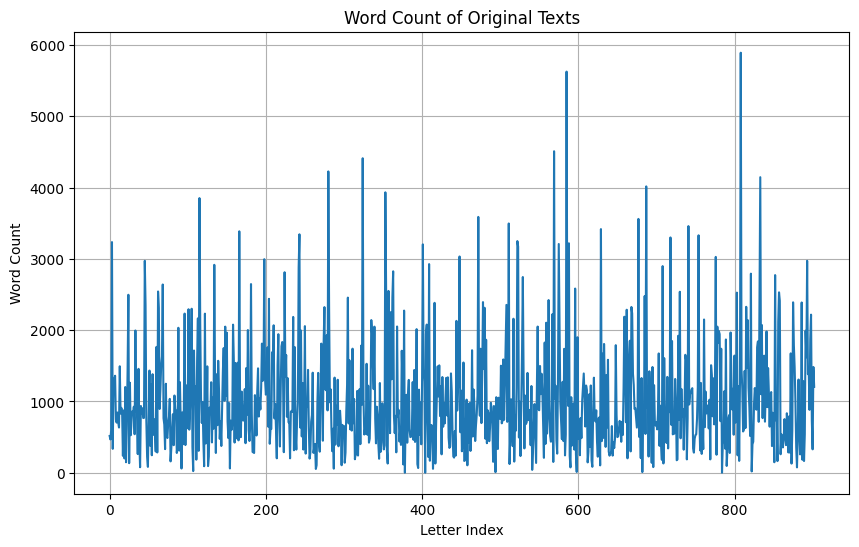

In [15]:
import matplotlib.pyplot as plt

# Plot the word count of the original text
plt.figure(figsize=(10, 6))
plt.plot(van_gogh_df['Original Text Word Count'], color='tab:blue')
plt.title('Word Count of Original Texts')
plt.xlabel('Letter Index')
plt.ylabel('Word Count')
plt.grid(True)
plt.show()

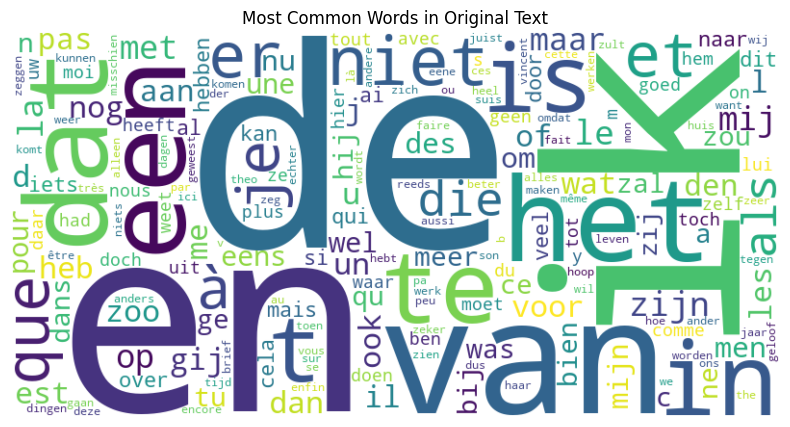

In [16]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_counts_in_original_text))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Original Text')
plt.show()

In [ ]:
# Combine all text from the "Original Text" column into a single string
translation_text = ' '.join(van_gogh_df['Translation'].dropna().values)

# Use regular expressions to find all words
words_in_translation = re.findall(r'\b\w+\b', translation_text.lower())

# Count the occurrences of each word
word_counts_in_translation = Counter(words_in_translation)

# Display the most common words
most_common_words_in_translation = word_counts_in_translation.most_common()
for word2, count2 in most_common_words_in_translation:
    print(f"{word2}: {count2}")

the: 39234
i: 34670
and: 30150
to: 27841
that: 22454
a: 21128
of: 20658
in: 18078
it: 17031
you: 16185
s: 10605
for: 10456
t: 8750
is: 7931
as: 7803
but: 7577
with: 7566
me: 7302
be: 7070
have: 6830
my: 6784
one: 6013
if: 5751
on: 5472
he: 5047
at: 5001
so: 4849
this: 4802
or: 4592
there: 4445
from: 4182
more: 4149
what: 4129
by: 3879
ll: 3870
not: 3853
about: 3736
we: 3736
was: 3730
do: 3722
all: 3686
very: 3671
m: 3610
are: 3518
can: 3410
would: 3296
your: 3263
which: 3204
will: 3077
like: 3043
now: 3032
when: 2885
ve: 2869
them: 2777
they: 2736
his: 2664
see: 2620
than: 2507
things: 2469
because: 2453
good: 2436
well: 2425
don: 2424
has: 2411
then: 2402
him: 2401
work: 2379
who: 2363
know: 2356
much: 2351
an: 2326
here: 2300
something: 2289
had: 2249
no: 2223
think: 2207
time: 2191
say: 2161
too: 2079
also: 1950
again: 1859
d: 1817
other: 1745
were: 1651
even: 1645
some: 1638
little: 1608
go: 1574
still: 1564
her: 1533
been: 1523
out: 1509
same: 1497
just: 1477
how: 1473
up: 1457
mu

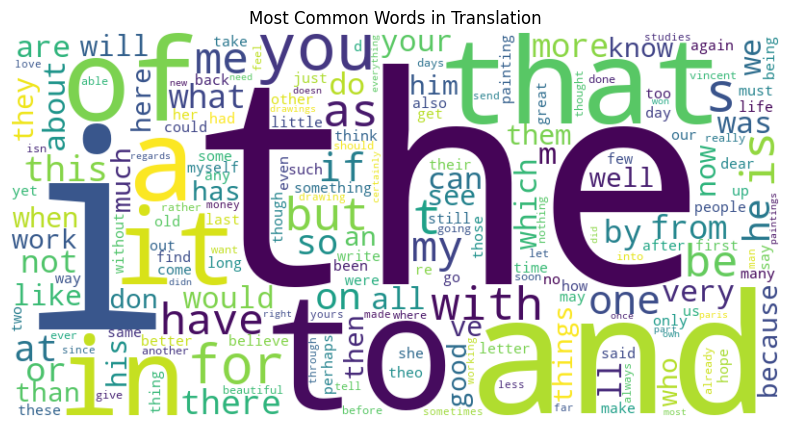

In [18]:
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(word_counts_in_translation))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Translation')
plt.show()

In [30]:
import nltk
from nltk.corpus import stopwords

# Ensure you have the stopwords corpus downloaded
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20193244\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [70]:
from collections import Counter

# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Filter out common English words from the list of words
filtered_words = [word for word in words_in_translation if word.lower() not in stop_words]

# Count the occurrences of each word
word_counts = Counter(filtered_words)

# Display the summed count of each word
for word, count in word_counts.items():
    print(f"{word}: {count}")

hague: 190
dec: 18
1881: 14
dear: 1093
theo: 1067
see: 2620
writing: 305
since: 757
last: 1018
sunday: 207
know: 2356
planned: 18
come: 1426
stay: 373
etten: 102
days: 904
afraid: 148
nothing: 859
would: 3296
short: 373
thought: 892
go: 1574
try: 434
another: 868
way: 1399
possible: 550
deal: 341
somewhat: 90
drastically: 1
spoke: 143
mauve: 69
said: 999
approve: 53
trouble: 200
good: 2436
month: 298
time: 2191
past: 316
first: 950
petty: 42
vexations: 20
painting: 1254
back: 946
het: 24
heike: 17
well: 2425
immediately: 198
installed: 6
front: 117
still: 1564
life: 1172
consisting: 7
couple: 163
old: 1245
clogs: 6
objects: 23
could: 1350
set: 225
work: 2379
also: 1950
evenings: 47
draw: 239
staying: 96
near: 81
small: 470
boarding: 24
house: 499
pay: 307
30: 158
guilders: 144
bed: 93
breakfast: 6
count: 114
100: 104
francs: 415
manage: 118
gives: 164
hope: 1116
making: 395
something: 2289
saleable: 36
quite: 543
soon: 841
anyway: 624
always: 838
bloody: 26
bore: 12
assure: 105
plain: 

In [73]:
# Assuming word_counts is a Counter object containing word frequencies
ordered_word_counts = word_counts.most_common()

# Display the ordered word counts
for word, count in ordered_word_counts:
    print(f"{word}: {count}")

one: 6013
would: 3296
like: 3043
see: 2620
things: 2469
good: 2436
well: 2425
work: 2379
know: 2356
much: 2351
something: 2289
think: 2207
time: 2191
say: 2161
also: 1950
even: 1645
little: 1608
go: 1574
still: 1564
must: 1456
believe: 1442
come: 1426
letter: 1408
way: 1399
make: 1374
people: 1366
could: 1350
better: 1327
get: 1256
painting: 1254
old: 1245
life: 1172
hope: 1116
find: 1110
us: 1102
yet: 1101
may: 1099
dear: 1093
perhaps: 1093
take: 1087
long: 1075
theo: 1067
write: 1056
many: 1043
day: 1040
last: 1018
said: 999
two: 988
great: 976
though: 968
thing: 960
first: 950
back: 946
without: 946
really: 944
want: 930
tell: 925
vincent: 921
already: 910
days: 904
thought: 892
feel: 892
let: 887
rather: 884
ever: 870
another: 868
nothing: 859
give: 851
soon: 841
always: 838
beautiful: 837
done: 829
going: 817
able: 790
drawing: 782
studies: 765
since: 757
far: 754
made: 733
love: 728
man: 724
send: 721
sometimes: 708
working: 704
money: 698
less: 692
drawings: 692
right: 682
every

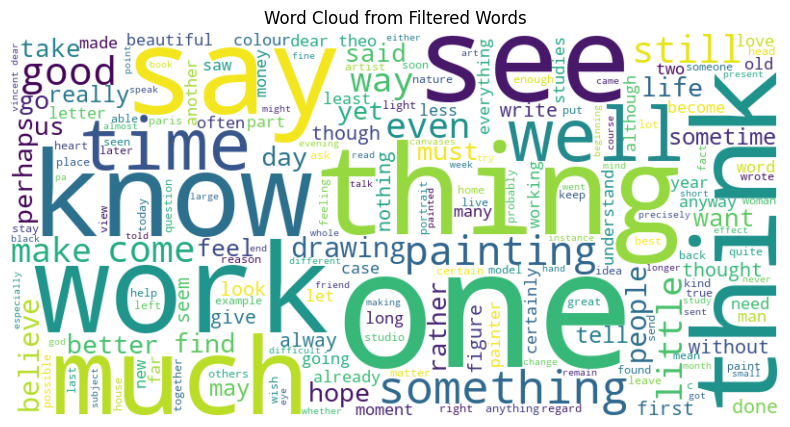

In [69]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

# Generate the word cloud from the filtered words
filtered_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(filtered_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud from Filtered Words')
plt.show()